In [ ]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/Colab Datasets/COVIDJuly2020/CovidApril14-2021'


dict = {}
dict['death'] = pd.read_csv(PATH+'/US_daily_cumulative_deaths_April14.csv',index_col='FIPS')
dict['case'] = pd.read_csv(PATH+'/US_daily_cumulative_cases_April14.csv',index_col='FIPS')
dict['Transmissible'] = pd.read_csv(PATH+'/Transmissible Cases.csv',index_col='FIPS').drop('Name', 1)
dict['Testing'] = pd.read_csv(PATH+'/Testing.csv',index_col='FIPS').drop('Name', 1)
dict['Density'] = pd.read_csv(PATH+'/Residential Density.csv',index_col='FIPS').drop('Name', 1)
dict['Mobility'] = pd.read_csv(PATH+'/Mobility.csv',index_col='FIPS').drop('Name', 1)
dict['Beds'] = pd.read_csv(PATH+'/Hospital Beds.csv',index_col='FIPS').drop('Name', 1)
dict['Spread'] = pd.read_csv(PATH+'/Disease Spread.csv',index_col='FIPS').drop('Name', 1)
dict['Distancing'] = pd.read_csv(PATH+'/Social Distancing.csv',index_col='FIPS').drop('Name', 1)

df_population = pd.read_csv(PATH+'/Population.csv')

# **Transpose** the dataframes and convert to **time series**
for key in dict:
  df = dict[key].transpose() # Transpose
  dict[key] = df.set_index(pd.to_datetime(df.index)) # convert to time series

dict['death'] = dict['death'].diff()
dict['case'] = dict['case'].diff()

# Most populous county
#The output result is the same as Wikipedia
#https://en.wikipedia.org/wiki/List_of_the_most_populous_counties_in_the_United_States

def nlargest_county( df_population, n =10):

  #Find the n counties with the largest population from the "Population.csv" data set, and return their FIPS codes and names
  a = df_population.nlargest(n, 'POPESTIMATE2019', keep='first')
  FIPS_code = a['FIPS'].values.tolist()
  name = a['COUNTY'].values.tolist()
  return FIPS_code, name


def get_name(FIPS = 6037):
  return df_population[df_population.FIPS == FIPS]['COUNTY'].values[0]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


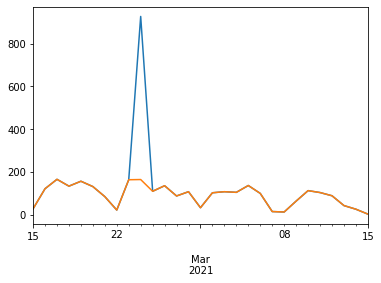

In [ ]:
e=a.copy()

e[c] = b[c]

a[date_rng].plot()
e[date_rng].plot()

In [ ]:
FIGPATH = '/content/drive/MyDrive/GPCE/Fix/'

def fix_outlier(df , number = 0,FIPS = 6037, window_size =15, threshold = 3):
  a= df[FIPS].copy()
  a[a < 0] = 0 # replace negative numbers in Pandas Data Frame by zero  
  b = a.rolling(window_size, center=True).mean()
  d = a.rolling(window_size, center=True).std()
  
  outlier =  (( a-b>threshold*d  ) & (a>10)) |(  ( b-a>threshold*d/3  ) & (a<5) )
  a[outlier] = b[outlier] *(window_size)/(window_size-1) - a[outlier]/(window_size-1)
  
  name = get_name(FIPS = FIPS)
  a.plot( title=name)
  plt.savefig(FIGPATH+str(number)+' '+name+'.png')
  plt.clf()



n =100
FIPS_code, name = nlargest_county( df_population, n =n)
for i in range(n):
  fix_outlier(dict['death'] ,number = i, FIPS = FIPS_code[i], window_size = 15, threshold = 3)



<Figure size 432x288 with 0 Axes>